In [1]:
from tabnanny import verbose
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV

In [2]:
plots = 'plots/'
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

Changing the Cols name becuase i used small dataset of husing the csv in housing1.csv in data

In [8]:
df = pd.read_csv('../data/housing.csv')

renamed_cols = {
    'longitude': 'Longitude',
    'latitude': 'Latitude',
    'housing_median_age': 'HouseAge',
    'total_rooms': 'TotalRooms',
    'total_bedrooms': 'TotalBedrooms',
    'population': 'Population',
    'households': 'Households',
    'median_income': 'MedInc',
    'median_house_value': 'MedHouseVal',
    'ocean_proximity': 'OceanProximity'
}

df = df.rename(columns=renamed_cols)
df.head(5)
df.describe()

,Longitude,Latitude,HouseAge,TotalRooms,TotalBedrooms,Population,Households,MedInc,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


doing log-transformation of the cols for bell shaped distribution

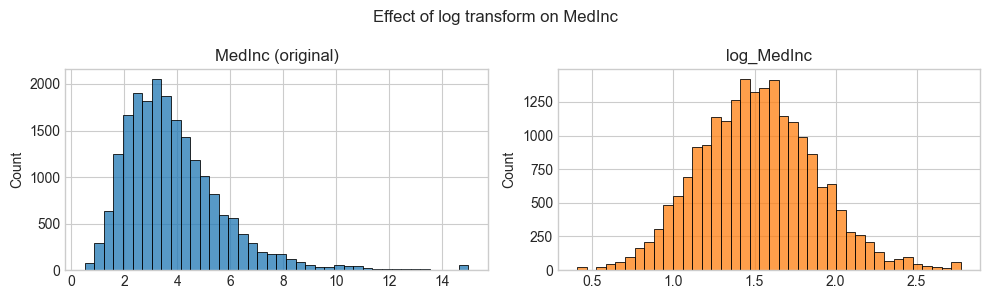

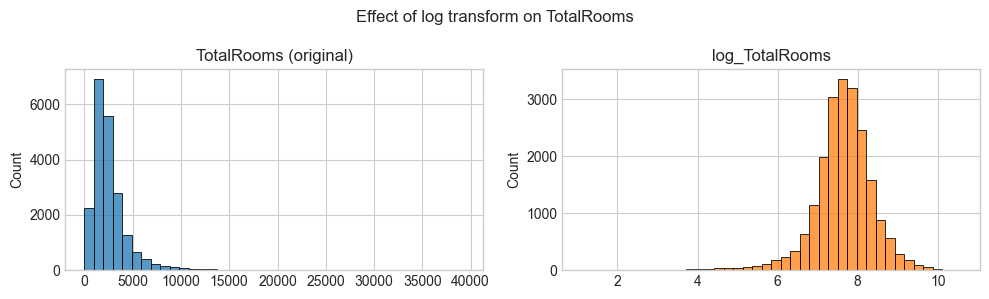

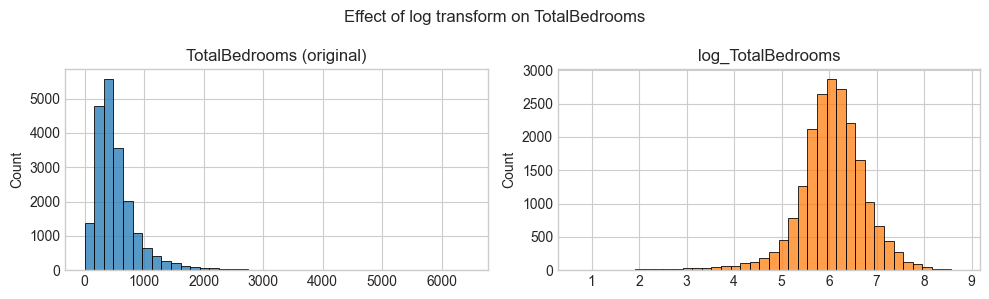

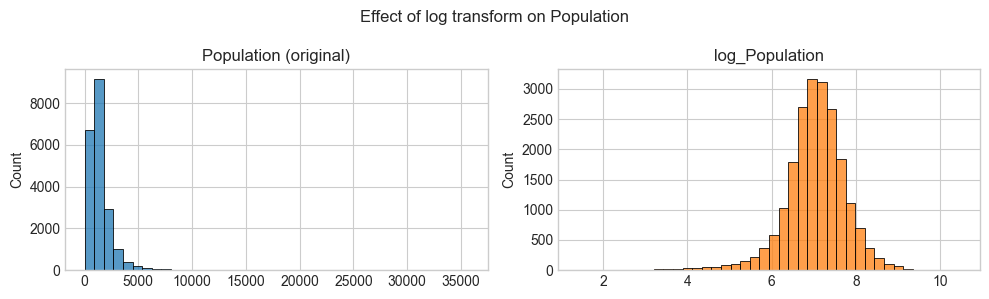

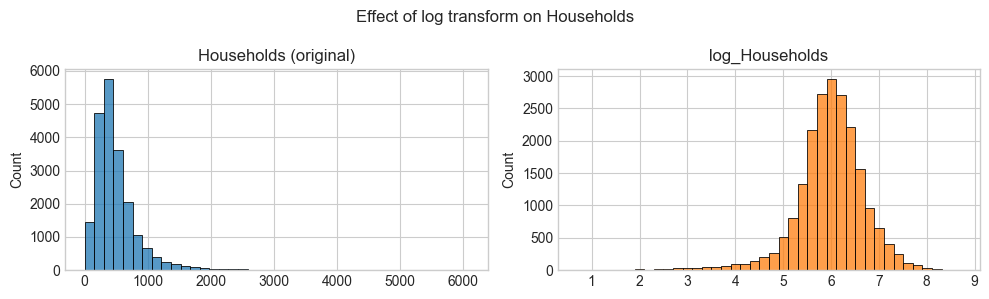

In [9]:
log_features = ['MedInc', 'TotalRooms', 'TotalBedrooms', 'Population', 'Households']
for feature in log_features:
    df[f'log_{feature}'] = np.log1p(df[feature])

for feature in log_features:
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))
    sns.histplot(df[feature], bins=40, ax=axes[0], color='#1f77b4')
    axes[0].set_title(f'{feature} (original)')
    sns.histplot(df[f'log_{feature}'], bins=40, ax=axes[1], color='#ff7f0e')
    axes[1].set_title(f'log_{feature}')
    for ax in axes:
        ax.set_xlabel('')
        ax.set_ylabel('Count')
    fig.suptitle(f'Effect of log transform on {feature}')
    plt.tight_layout()

plt.show()

Doing EDA 